In [29]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import notebook_helper
import sys
from mprompt.modules import fmri
import seaborn as sns
from mprompt.data.data import TASKS_D3
import mprompt.data.data
import numpy as np
from scipy.special import softmax
from collections import defaultdict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Look at datasets

In [30]:
d = defaultdict(list)
for task_name in TASKS_D3:
    task = TASKS_D3[task_name]
    d['Module name'].append(task_name[task_name.index('_')+1:].replace('_', '-'))
    d['Groundtruth keyphrase'].append(mprompt.data.data.get_groundtruth_keyword(task_name))
    d['Dataset explanation'].append(task['groundtruth_explanation'])
    data = task['gen_func'](return_df=True)
    # d['Example'].append(data['input'][data['label'] == 1].iloc[0])
    d['Examples'].append(len(data))
    d['Unique unigrams'].append(len(set(' '.join(data['input']).split())))
    # d['Majority class fraction'].append(data['label'].mean().round(2))
df = pd.DataFrame.from_dict(d)

# display dataframe with clipping strings
with pd.option_context('display.max_colwidth', 100):
    display(df)
    df.style.hide(axis='index').to_latex('../results/figs/synthetic_examples_full.tex', hrules=True)
    # df[::3].to_latex('../results/figs/synthetic_examples.tex', index=False)

,Module name,Groundtruth keyphrase,Dataset explanation,Examples,Unique unigrams
0,0-irony,sarcasm,contains irony,590,3897
1,1-objective,unbiased,is a more objective description of what happened,739,5628
2,2-subjective,subjective,contains subjective opinion,757,5769
3,3-god,religious,believes in god,164,1455
4,4-atheism,atheistic,is against religion,172,1472
5,5-evacuate,evacuation,involves a need for people to evacuate,2670,16505
6,6-terorrism,terrorism,describes a situation that involves terrorism,2640,16608
7,7-crime,crime,involves crime,2621,16333
8,8-shelter,shelter,describes a situation where people need shelter,2620,16347
9,9-food,hunger,is related to food security,2642,16276


### Visualize data matrix

In [31]:
fname = '../results/mean_preds_matrix_d3___instructor.pkl'
# fname = '../results/mean_preds_matrix_d3___facebook__opt-iml-max-30b.pkl'
# mat = pkl.load(open('../results/mean_preds_matrix_d3.pkl', 'rb'))
mat = pkl.load(open(fname, 'rb'))
n = mat.shape[0]

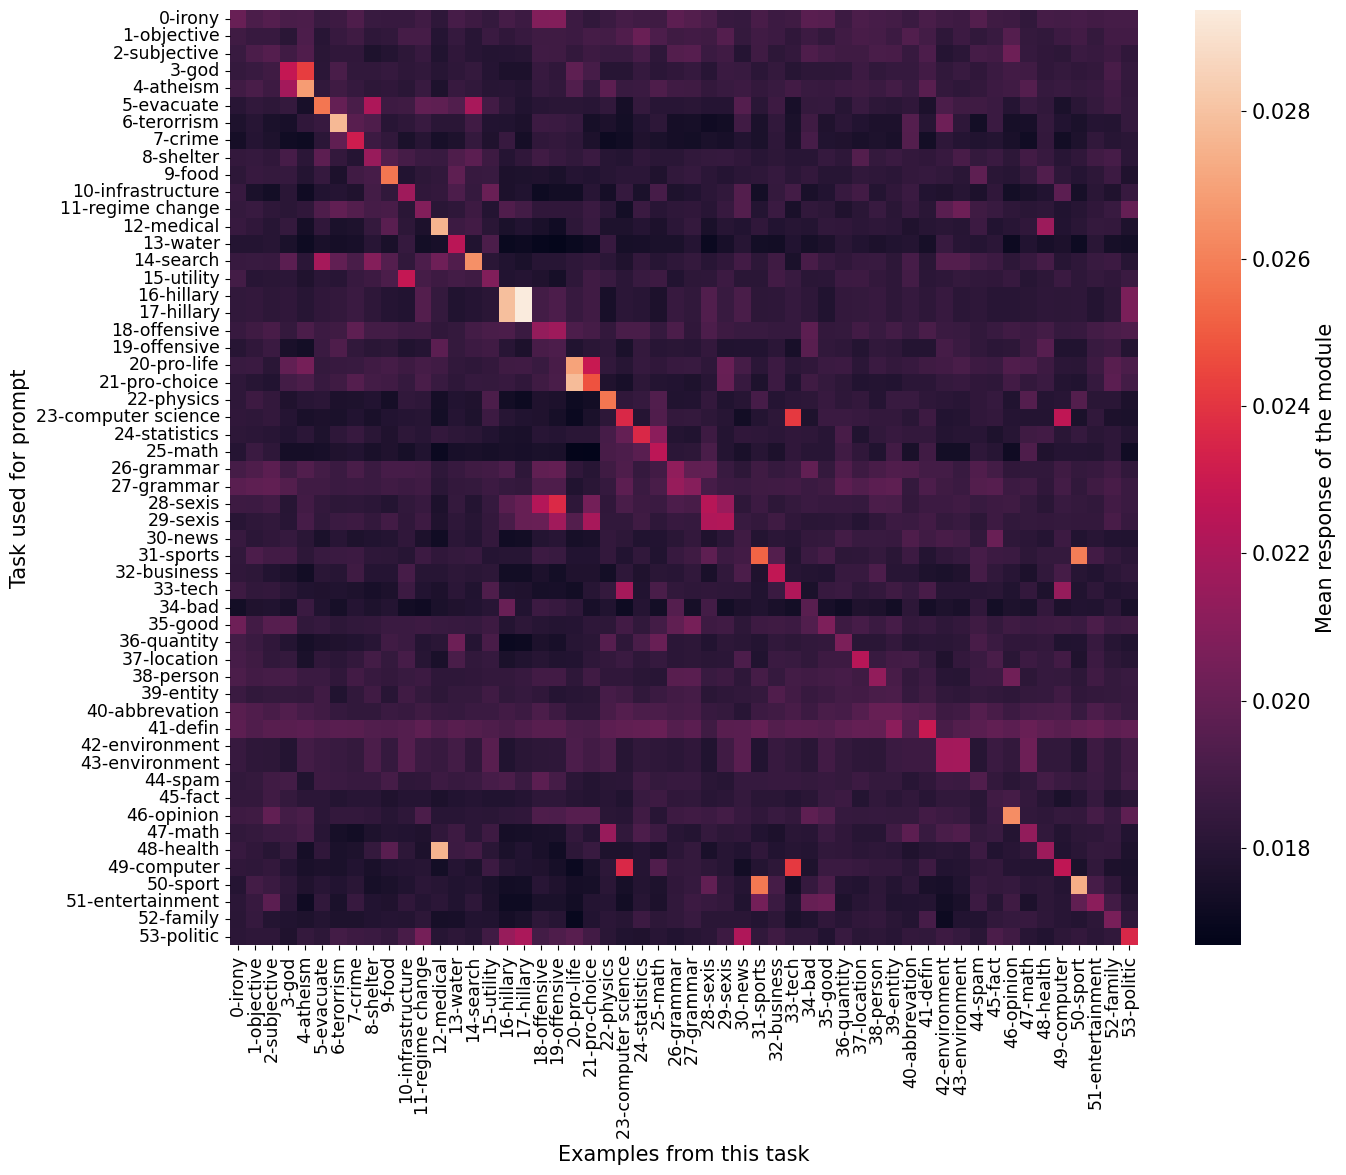

In [33]:
mp = mat
mp = softmax(mp, axis=0)
# divide each row by its max value
# mp = mp / (np.max(mp, axis=1).reshape(-1, 1))
# mp = mp / (np.max(mp, axis=0).T)
# mp = np.log(mp)

plt.figure(figsize=(14, 12))
# plt.title(os.path.basename(fname))
sns.heatmap(mp, cbar_kws={'label': 'Mean response of the module'})
labs = list(map(lambda x: x[3:].replace('_', '-'), list(TASKS_D3.keys())))
plt.ylabel('Task used for prompt')
plt.xlabel('Examples from this task')
plt.yticks(np.arange(len(TASKS_D3)) + 0.5, labels=labs, rotation='horizontal', fontsize='small')
plt.xticks(np.arange(len(TASKS_D3)) + 0.5, labels=labs, rotation='vertical', fontsize='small')
plt.savefig('../results/figs/mean_preds_d3.pdf', bbox_inches='tight')
plt.show()

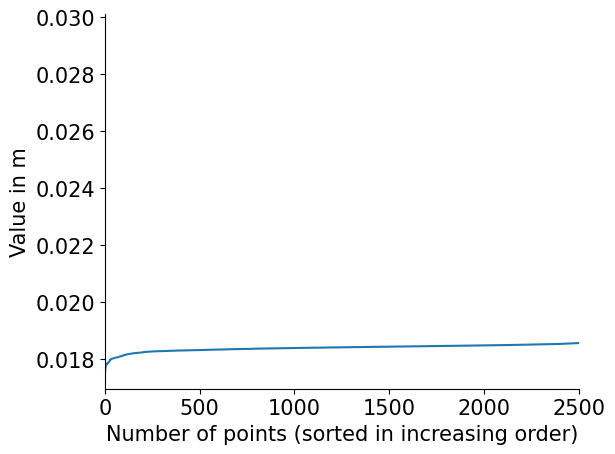

In [6]:
# plt.hist(m.flatten())
# plt.xscale('log')
plt.ylabel('Value in m')
plt.xlabel('Number of points (sorted in increasing order)')
plt.plot(np.sort(mp.flatten()))
plt.xlim((0, 2500))
plt.show()